# Obtain

In [30]:
# load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# chosen retail data from https://www.kaggle.com/manjeetsingh/retaildataset

# macos path
df_feature = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/Features data set.csv", parse_dates=["Date"])
df_sales = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/sales data-set.csv", parse_dates=["Date"])
df_store = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/stores data-set.csv")

# # windows path
# df_feature = pd.read_csv("C:/Users/dwihd/Desktop/thelead.io/p0/data/Features data set.csv")
# df_sales = pd.read_csv("C:/Users/dwihd/Desktop/thelead.io/p0/data/sales data-set.csv")
# df_store = pd.read_csv("C:/Users/dwihd/Desktop/thelead.io/p0/data/stores data-set.csv")

# Scrub

In [31]:
# prepping df_feature & df_sales to be merged, by date
data_date = df_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']
data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)

# convert weekly_sales to millions
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)

# merge feature & sales tables by date
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )    # 45 because we sum IsHoliday in first line of code in this cell

data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,46.601399,60.663782,3.358607,171.578394,7.999151
std,5.399713,15.172792,0.429401,3.100148,0.483853
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.720222,2.885367,168.408144,7.508333
50%,46.000000,61.051111,3.488644,171.386189,8.150133
75%,47.000000,74.697333,3.726133,174.724576,8.428578
max,80.000000,82.176444,3.997778,176.652613,8.619311


In [32]:
# combine df_store with df_feature w.r.t 'Store' column
data_Store = df_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})

# combine df_store with df_sales w.r.t 'Store' column
temp_store = df_sales.groupby("Store").agg({"Weekly_Sales":"sum"})

# convert weekly_sales to millions
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)

# set 'Store' as index, and sort data by 'Store' from 1 to 45
data_Store.set_index(np.arange(0,45),inplace=True)

# populate df_store with data from df_feature & df_sales , w.r.t 'Store' column
df_store["temp"] = data_Store.Temperature
df_store["Fuel_Price"] = data_Store.Fuel_Price
df_store["holiday"] = data_Store.IsHoliday
df_store["Weekly_Sales"] = temp_store.Weekly_Sales

df_store = df_store.dropna()

In [33]:
df_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,44.000000,44.000000,44.000000,44.000000,44.0,44.000000
mean,23.500000,129809.704545,59.184474,3.409327,13.0,150.090909
std,12.845233,64481.667616,10.003585,0.154061,0.0,78.780478
min,2.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.750000,67334.000000,51.705618,3.259242,13.0,78.500000
50%,23.500000,126172.500000,57.182033,3.328764,13.0,140.500000
75%,34.250000,202356.500000,68.691429,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


# Explore

- Explore "data" variable (df_feature + df_sales w.r.t 'date' column)
- Explore "df_store" variable (df_store + "data" w.r.t 'Store' column)
- Explore in department wise, using df_sales data grouped by 'Dept' column

- Here to below, code NOT commented well yet

- Analyse store sales by yearly, w.r.t store 'Type'
- Analysis of each markdown

<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

<Figure size 1080x288 with 0 Axes>

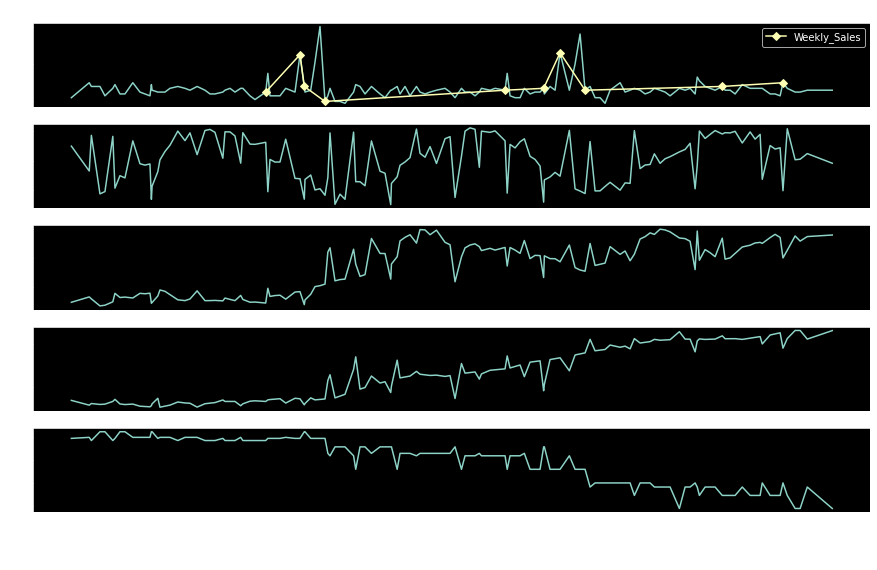

In [34]:
# # Explore "data" variable (df_feature + df_sales w.r.t 'date' column)


# plot time series data to see any irregular pattern (in combined feature & sales df)

# COLOR = 'black'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR


# create empty canvas with given size
plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 

# weekly_sales + holiday sales
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")


# other plots
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")


- Nov-Dec shows spike in Weekly Sales.but over the year it is not increased, and weeks nearby holiday shows peak
- Temperature is showing a no pattern (random walk)
- Fuel Price and Consumer Price Index shown growth over the year.
- Unemployment decreased year after year.


<AxesSubplot:>

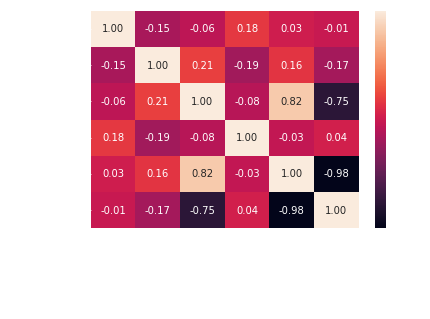

In [35]:
# heatmap

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

- Weekly sales doesnot show any high correlation with any other parameters.
- CPI and Unemployment shows negative correlation on other hand Fuel Price show positive correlation
- Unemployment and Fuel price are also negatively correlated

Text(0, 0.5, 'Sales')

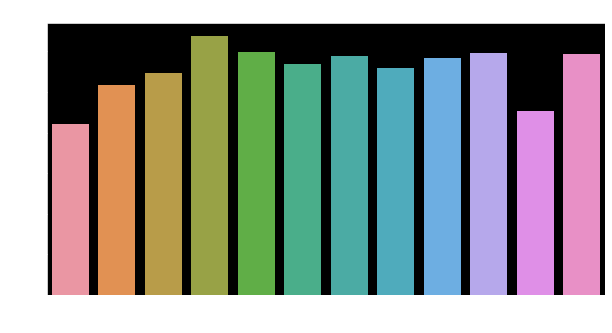

In [36]:
# plot sales by months

data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

- It could be as Enough buying during offer and holidays (Black friday Sales,Chrismas,New year) and later sales go down and then again gaining momentum in some months.
- In Nov also people show less buying can be waiting period for upcoming sales.
- Whole data for Dec-2013 I guess is not available so even after spike in Dec the sales are not gone very high.

Text(0, 0.5, 'Sales')

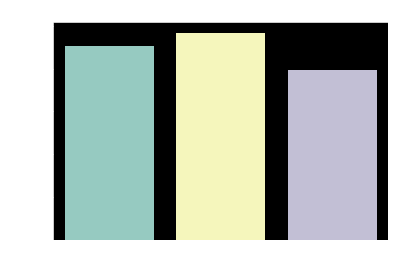

In [37]:
# plot sales by years

data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})
sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

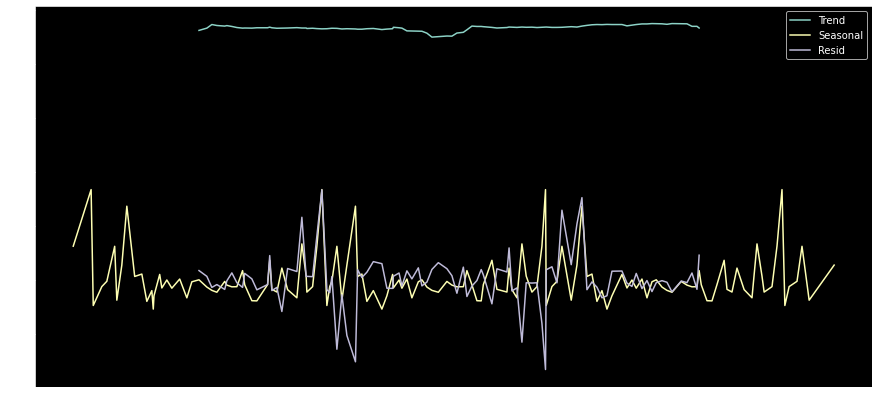

In [38]:
# check whether weekly_sales data have any trend (up, down, sideways), using seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45)

plt.figure(figsize=(15, 7))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(["Trend", "Seasonal","Resid"], loc ="upper right") 


- sideway trend

/Users/dwihadyan/opt/anaconda3/envs/quantra38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

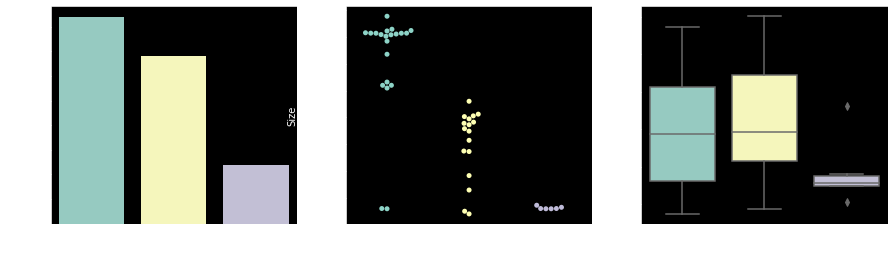

In [39]:
# # Explore "df_store" variable (df_store + "data" w.r.t 'Store' column)

# Plots to understand the pattern of the data
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(df_store.Type,ax=ax[0])
sns.swarmplot(data = df_store,y="Size",x="Type",ax=ax[1])

sns.boxplot(data = df_store,y="Weekly_Sales",x="Type",ax=ax[2])

- Number of stores by Types : Store Count is in the order of A, B and least is C
- Size of stores by Types : Size wise A store as most number of Item followed by B and than C
- Weekly_sales of stores by Types : Even After less Count of Store and lesser Size B has more Weekly Sales than A and C at the least.

In [40]:
# # Explore in department wise, using df_sales data grouped by 'Dept' column

# get data from df_sales, grouped by Dept
data_Dept = df_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})

# convert sales to millions
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Department')

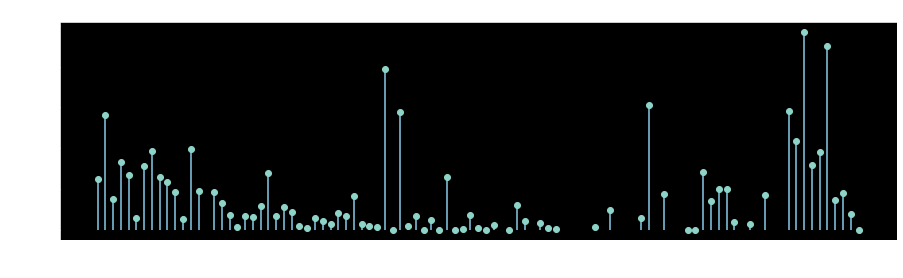

In [41]:
# plot of each dept sales

fig1, ax1 = plt.subplots(figsize=(15, 4))
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

- Here we can see department 1-15 as well as 90-95 has shown higher weekly sales.
- some department as 38,40,72 has shown higher weekly sales.

# CONTINUE READ FROM HERE

In [42]:
# # Analyse store sales by yearly, w.r.t store 'Type'

# group data by date & store, sum the sales
sales_date_store = df_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})

# sort by index
sales_date_store.sort_index(inplace=True)

# convert sales to millions
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)

# merge df_feature & df that group data by date_year & store_type 
data_table = pd.merge(df_feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,df_store[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

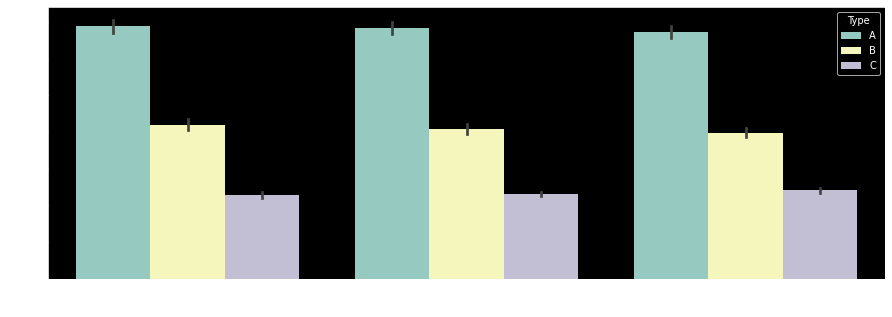

In [43]:
# grouped by year

plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

- Store Type A & B has shown slight decrease year on basis in sales.
- Store C has shown a slight increase in sales.

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

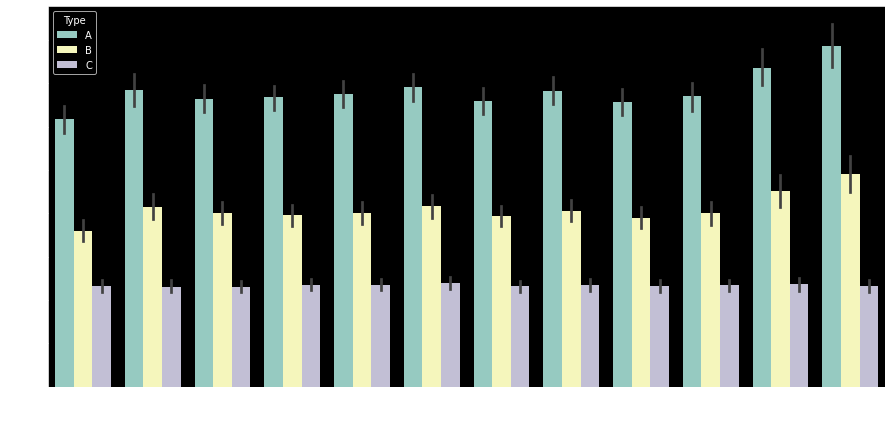

In [44]:
# grouped by month

plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

- Type A & B store show spike in Nov Dec mostly due to holiday whereas jan has shown decrease in sale.
- Type C is consistent over every month and doesnot show much deviation.

Text(0.5, 0, 'Date')

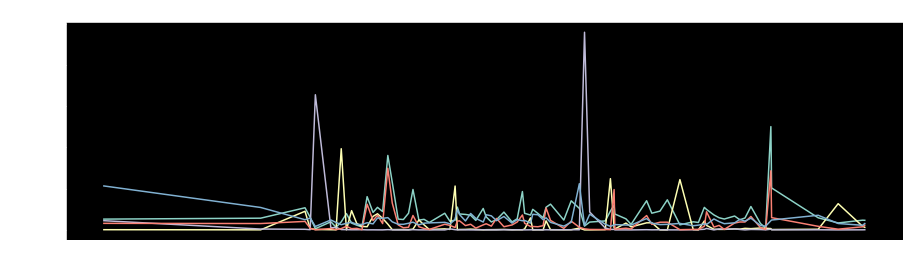

In [45]:
# # Analysis of each markdown


# plot in timeseries to see any pattern
plt.figure(figsize=(15,4))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Timeline Markdown")
plt.ylabel("Markdown")
plt.xlabel("Date")

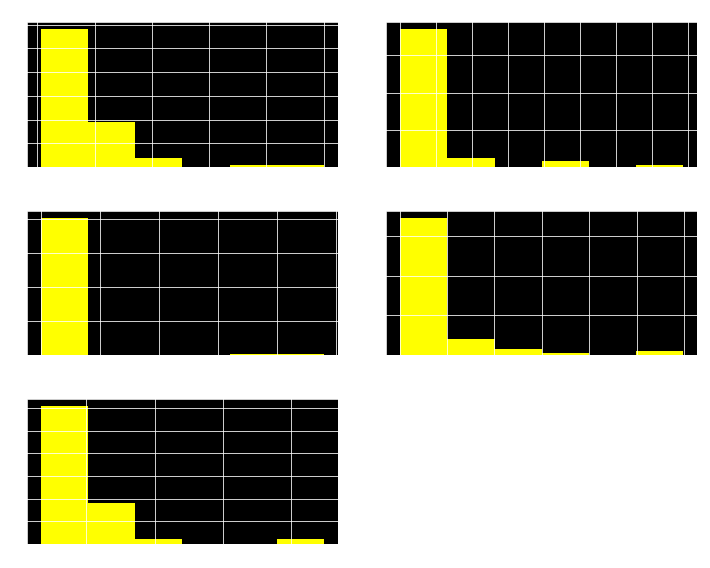

In [46]:
# plot each markdown in barplot

train_markdown.hist(figsize=(10,8),bins=6,color='yellow')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Markdown')

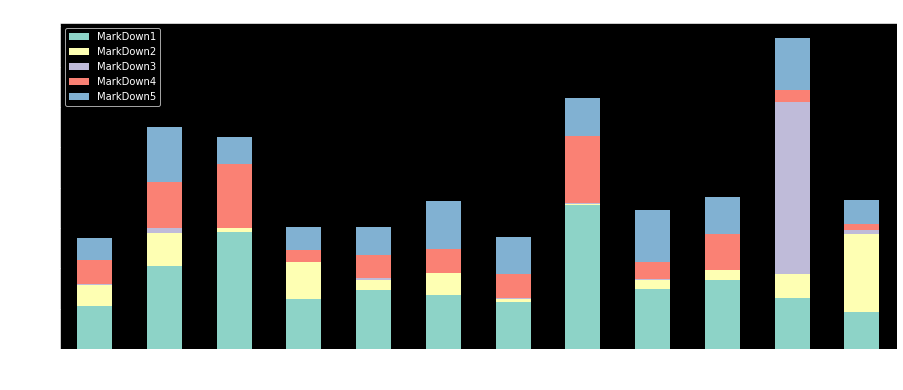

In [47]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Morkdown")
plt.ylabel("Markdown")

Text(0, 0.5, 'Markdown')

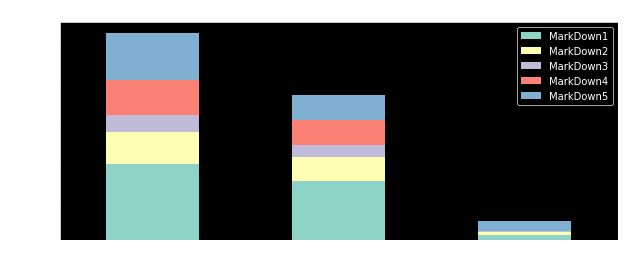

In [48]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Stacked StoreType Wise")
plt.ylabel("Markdown")

# Model

- Using multiple models to see which has the best accuracy (loop through different models)

In [49]:
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

# import xgboost as xgb
# import lightgbm as lgb

In [50]:
def createdummies(data,cols):
    for col in cols:
        one_hot = pd.get_dummies(data[col],prefix=col)
        data = data.join(one_hot)
        data.drop(col,axis = 1,inplace=True)
    
    return data

In [51]:
# imputing the missing value
itt = IterativeImputer()
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]

data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

#create new column
data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table["WeekofYear"] = data_table.Date.dt.weekofyear
data_table.drop(['Date'],axis=1,inplace=True)

#create dummies out of categorical column
data_table = createdummies(data_table,["Type","Month","Year","WeekofYear"])

/var/folders/29/_r682w3n2m95fqd9bv6_hk300000gn/T/ipykernel_7933/3977616290.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_table["WeekofYear"] = data_table.Date.dt.weekofyear


In [52]:
# data split 

data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
# run multiple models 

classifiers = [
    LinearRegression(),
    ElasticNet(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(), 
    LinearSVR(), 
    NuSVR()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

/Users/dwihadyan/opt/anaconda3/envs/quantra38/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/dwihadyan/opt/anaconda3/envs/quantra38/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [54]:
# plot result of each model performance

# rmse : root mean square errors (lower better)
# score : accuracy score (higher better)

df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score,model
name,,,
LinearSVR,128.739354,-4.076261,LinearSVR()
KernelRidge,127.389990,-3.970406,"KernelRidge(alpha=0.6, coef0=2.5, kernel='poly..."
SVR,53.998650,0.106927,SVR()
NuSVR,53.884907,0.110685,NuSVR()
Lasso,51.878844,0.175669,"Lasso(alpha=16, random_state=100)"
ElasticNet,45.861982,0.355791,ElasticNet()
ElasticNet,45.226575,0.373518,ElasticNet(alpha=0.8)
RidgeCV,39.960764,0.510910,"RidgeCV(alphas=array([0.001, 0.01 , 0.1 , 1. ..."
LinearRegression,39.947242,0.511241,LinearRegression()


# iNterpret

In [55]:
# prediction using best model (randomforest)

model = df_score.loc["RandomForestRegressor","model"]
data_test.drop(['Weekly_Sales'],axis=1,inplace=True)
predict = model.predict(data_test)
predict

/Users/dwihadyan/opt/anaconda3/envs/quantra38/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([163.08, 163.39, 161.4 , ...,  82.16,  81.74,  88.57])